In [286]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [287]:
#pip install pystan==2.19.1.1

In [288]:
#pip install prophet

In [289]:
import pandas as pd
from prophet import Prophet

In [290]:
#pip install --upgrade plotly

In [291]:
df= pd.read_csv('Israel_rawdata.csv')
df.head()

,date,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,09-01-2021,NaN,NaN,Israel,2021-09-02 04:21:15,31.046051,34.851612,1082981,7086,NaN,NaN,Israel,12511.99665,0.654305
1,09-02-2021,NaN,NaN,Israel,2021-09-03 04:21:20,31.046051,34.851612,1096881,7122,NaN,NaN,Israel,12672.58742,0.649296
2,09-03-2021,NaN,NaN,Israel,2021-09-04 04:21:28,31.046051,34.851612,1104971,7129,NaN,NaN,Israel,12766.05356,0.645175
3,09-04-2021,NaN,NaN,Israel,2021-09-05 04:21:33,31.046051,34.851612,1112964,7154,NaN,NaN,Israel,12858.39903,0.642788
4,09-05-2021,NaN,NaN,Israel,2021-09-06 04:21:22,31.046051,34.851612,1117596,7205,NaN,NaN,Israel,12911.91388,0.644687


In [292]:
df=df.dropna(axis=1, how='all')

In [293]:
df=df.dropna(axis = 0, how = 'all')

In [294]:
df.head()

,date,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,09-01-2021,Israel,2021-09-02 04:21:15,31.046051,34.851612,1082981,7086,Israel,12511.99665,0.654305
1,09-02-2021,Israel,2021-09-03 04:21:20,31.046051,34.851612,1096881,7122,Israel,12672.58742,0.649296
2,09-03-2021,Israel,2021-09-04 04:21:28,31.046051,34.851612,1104971,7129,Israel,12766.05356,0.645175
3,09-04-2021,Israel,2021-09-05 04:21:33,31.046051,34.851612,1112964,7154,Israel,12858.39903,0.642788
4,09-05-2021,Israel,2021-09-06 04:21:22,31.046051,34.851612,1117596,7205,Israel,12911.91388,0.644687


In [295]:
df=df[['date','Confirmed']]

In [296]:
df

,date,Confirmed
0,09-01-2021,1082981
1,09-02-2021,1096881
2,09-03-2021,1104971
3,09-04-2021,1112964
4,09-05-2021,1117596
...,...,...
195,03-15-2022,3732579
196,03-16-2022,3737345
197,03-17-2022,3745401
198,03-18-2022,3751042


In [297]:
df["date"][1]

'09-02-2021'

In [298]:
import datetime


In [299]:
df["date"]=df["date"].apply(lambda x: datetime.datetime.strptime(x,"%m-%d-%Y").strftime("%Y-%m-%d"))

In [300]:
df.head()

,date,Confirmed
0,2021-09-01,1082981
1,2021-09-02,1096881
2,2021-09-03,1104971
3,2021-09-04,1112964
4,2021-09-05,1117596


In [301]:
df.rename(columns={'date': 'ds', 'Confirmed': 'y'}, inplace=True)

In [302]:
df

,ds,y
0,2021-09-01,1082981
1,2021-09-02,1096881
2,2021-09-03,1104971
3,2021-09-04,1112964
4,2021-09-05,1117596
...,...,...
195,2022-03-15,3732579
196,2022-03-16,3737345
197,2022-03-17,3745401
198,2022-03-18,3751042


In [303]:
m=Prophet()
m.add_country_holidays(country_name='Israel')#
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [304]:
future = m.make_future_dataframe(periods=50)

In [305]:
future

,ds
0,2021-09-01
1,2021-09-02
2,2021-09-03
3,2021-09-04
4,2021-09-05
...,...
245,2022-05-04
246,2022-05-05
247,2022-05-06
248,2022-05-07


In [306]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-09-01,1.103540e+06,1.070065e+06,1.134824e+06
1,2021-09-02,1.110339e+06,1.076429e+06,1.145677e+06
2,2021-09-03,1.112033e+06,1.079323e+06,1.147068e+06
3,2021-09-04,1.112651e+06,1.077570e+06,1.147559e+06
4,2021-09-05,1.117110e+06,1.084520e+06,1.151464e+06
...,...,...,...,...
245,2022-05-04,4.417761e+06,3.720076e+06,4.957988e+06
246,2022-05-05,4.430062e+06,3.715921e+06,4.975943e+06
247,2022-05-06,4.437257e+06,3.695369e+06,5.006253e+06
248,2022-05-07,4.443377e+06,3.683726e+06,5.018030e+06


In [307]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Hanukkah,Hanukkah_lower,Hanukkah_upper,Independence Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-01,1.095648e+06,1.070065e+06,1.134824e+06,1.095648e+06,1.095648e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7892.036821,7892.036821,7892.036821,0.0,0.0,0.0,1.103540e+06
1,2021-09-02,1.102599e+06,1.076429e+06,1.145677e+06,1.102599e+06,1.102599e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7740.070608,7740.070608,7740.070608,0.0,0.0,0.0,1.110339e+06
2,2021-09-03,1.109551e+06,1.079323e+06,1.147068e+06,1.109551e+06,1.109551e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2482.167132,2482.167132,2482.167132,0.0,0.0,0.0,1.112033e+06
3,2021-09-04,1.116502e+06,1.077570e+06,1.147559e+06,1.116502e+06,1.116502e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3850.706018,-3850.706018,-3850.706018,0.0,0.0,0.0,1.112651e+06
4,2021-09-05,1.123453e+06,1.084520e+06,1.151464e+06,1.123453e+06,1.123453e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-6342.987999,-6342.987999,-6342.987999,0.0,0.0,0.0,1.117110e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022-05-04,4.409869e+06,3.720076e+06,4.957988e+06,3.712701e+06,4.941134e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7892.036821,7892.036821,7892.036821,0.0,0.0,0.0,4.417761e+06
246,2022-05-05,4.422322e+06,3.715921e+06,4.975943e+06,3.703411e+06,4.974351e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7740.070608,7740.070608,7740.070608,0.0,0.0,0.0,4.430062e+06
247,2022-05-06,4.434775e+06,3.695369e+06,5.006253e+06,3.702631e+06,5.000704e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2482.167132,2482.167132,2482.167132,0.0,0.0,0.0,4.437257e+06
248,2022-05-07,4.447228e+06,3.683726e+06,5.018030e+06,3.688249e+06,5.031246e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3850.706018,-3850.706018,-3850.706018,0.0,0.0,0.0,4.443377e+06


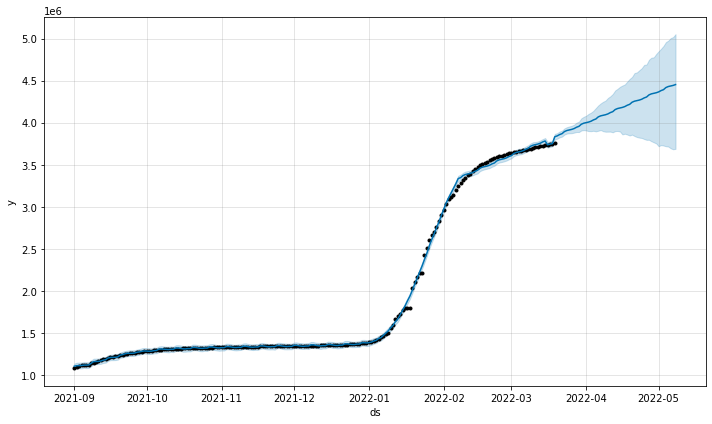

In [308]:
fig1 = m.plot(forecast)

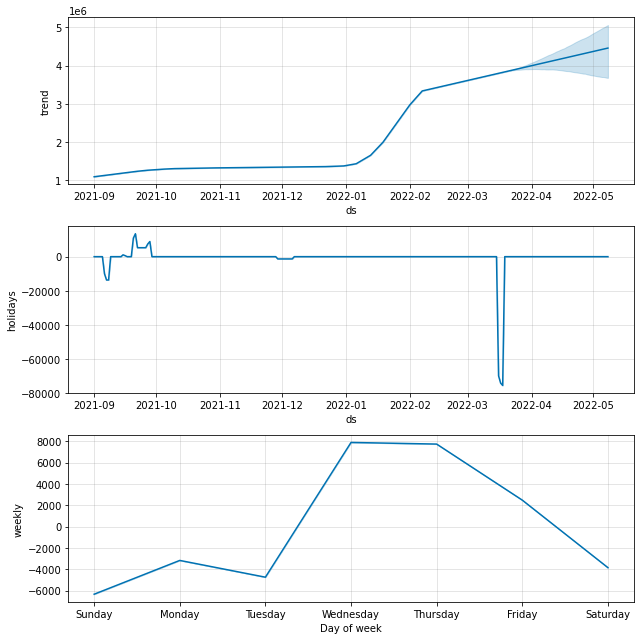

In [309]:
fig2 = m.plot_components(forecast)

In [310]:
#pip install ipywidgets

In [311]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [312]:
plot_components_plotly(m, forecast)


In [313]:
#help(Prophet)

In [314]:
 #help(Prophet.fit)

In [315]:
#above By default, Prophet uses a linear model for its forecast

In [316]:
# blow, make forecasts using a logistic growth trend model, with a specified carrying capacity
#Saturating Forecasts
#Forecasting Growth

In [317]:
# specify the carrying capacity in a column cap
df['cap'] = 3900000 # get from the logistic model
#cap does not have to be constant. If the market size is growing, then cap can be an increasing sequence.

In [318]:
df

,ds,y,cap
0,2021-09-01,1082981,3900000
1,2021-09-02,1096881,3900000
2,2021-09-03,1104971,3900000
3,2021-09-04,1112964,3900000
4,2021-09-05,1117596,3900000
...,...,...,...
195,2022-03-15,3732579,3900000
196,2022-03-16,3737345,3900000
197,2022-03-17,3745401,3900000
198,2022-03-18,3751042,3900000


In [319]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly 

In [333]:
m = Prophet(changepoint_prior_scale=0.18,growth='logistic')
##
##If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), 
#you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05.
#Increasing it will make the trend more flexible:
##
m.add_country_holidays(country_name='Israel')###
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)#???
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [334]:
#m.train_holiday_names

In [335]:
#We make a dataframe for future predictions as before, except we must also specify the capacity in the future.
#this may cause issue // since it does not consider the evolution of virus type and their different spread power 
#Here we keep capacity constant at the same value as in the history, and forecast 5 years into the future:

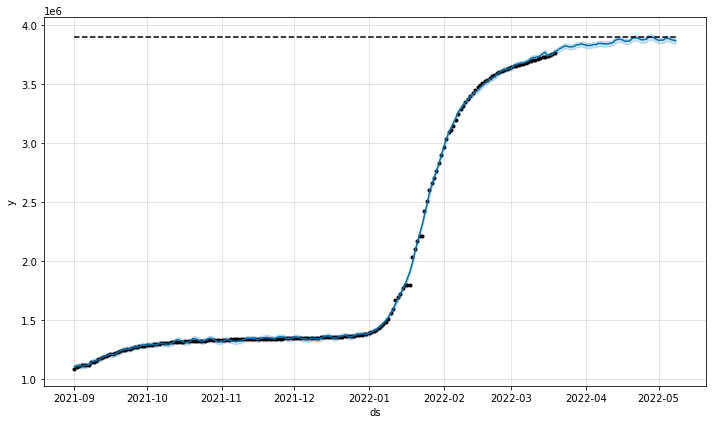

In [336]:
future = m.make_future_dataframe(periods=50)
future['cap'] = 3900000
fcst = m.predict(future)
fig = m.plot(fcst)

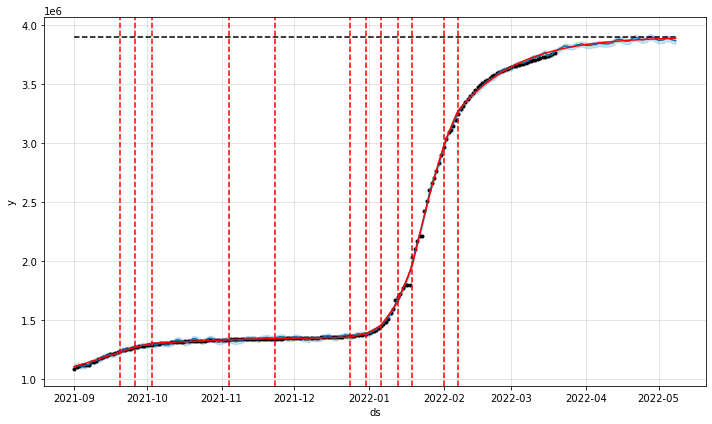

In [337]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

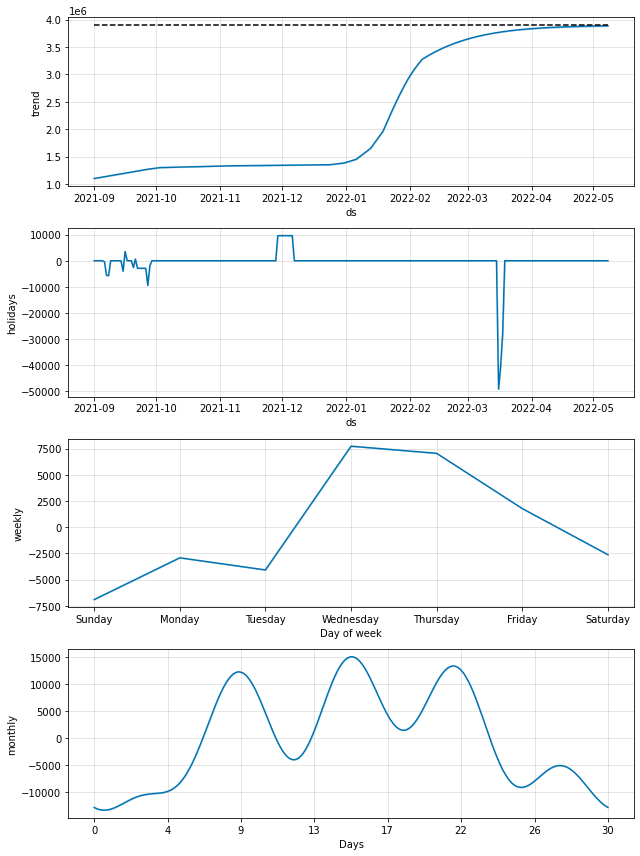

In [338]:
fig_s = m.plot_components(fcst)

In [282]:
fcst

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Hanukkah,Hanukkah_lower,Hanukkah_upper,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-01,1.092627e+06,3900000,1.074246e+06,1.123440e+06,1.092627e+06,1.092627e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,7437.288905,7437.288905,7437.288905,0.0,0.0,0.0,1.100065e+06
1,2021-09-02,1.099750e+06,3900000,1.082706e+06,1.129684e+06,1.099750e+06,1.099750e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,6827.715765,6827.715765,6827.715765,0.0,0.0,0.0,1.106578e+06
2,2021-09-03,1.106901e+06,3900000,1.084789e+06,1.128957e+06,1.106901e+06,1.106901e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,1526.937571,1526.937571,1526.937571,0.0,0.0,0.0,1.108428e+06
3,2021-09-04,1.114080e+06,3900000,1.086780e+06,1.135156e+06,1.114080e+06,1.114080e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,-2756.686511,-2756.686511,-2756.686511,0.0,0.0,0.0,1.111323e+06
4,2021-09-05,1.121286e+06,3900000,1.091059e+06,1.136898e+06,1.121286e+06,1.121286e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,-6599.609835,-6599.609835,-6599.609835,0.0,0.0,0.0,1.114687e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022-05-04,3.885591e+06,3900000,3.865609e+06,3.915599e+06,3.875731e+06,3.891954e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,7437.288905,7437.288905,7437.288905,0.0,0.0,0.0,3.893028e+06
246,2022-05-05,3.886234e+06,3900000,3.865450e+06,3.916645e+06,3.876438e+06,3.892468e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,6827.715765,6827.715765,6827.715765,0.0,0.0,0.0,3.893062e+06
247,2022-05-06,3.886849e+06,3900000,3.860128e+06,3.912144e+06,3.876916e+06,3.892963e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,1526.937571,1526.937571,1526.937571,0.0,0.0,0.0,3.888376e+06
248,2022-05-07,3.887437e+06,3900000,3.857973e+06,3.910152e+06,3.877573e+06,3.893411e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,-2756.686511,-2756.686511,-2756.686511,0.0,0.0,0.0,3.884680e+06


In [283]:
# cross validation for tuning parameters : changepoint_prior_scale(flexiblity), cap?
#not enough data for yearly & (holiday (yearly)) components?

In [326]:
help(Prophet.add_seasonality)

Help on function add_seasonality in module prophet.forecaster:

add_seasonality(self, name, period, fourier_order, prior_scale=None, mode=None, condition_name=None)
    Add a seasonal component with specified period, number of Fourier
    components, and prior scale.
    
    Increasing the number of Fourier components allows the seasonality to
    change more quickly (at risk of overfitting). Default values for yearly
    and weekly seasonalities are 10 and 3 respectively.
    
    Increasing prior scale will allow this seasonality component more
    flexibility, decreasing will dampen it. If not provided, will use the
    seasonality_prior_scale provided on Prophet initialization (defaults
    to 10).
    
    Mode can be specified as either 'additive' or 'multiplicative'. If not
    specified, self.seasonality_mode will be used (defaults to additive).
    Additive means the seasonality will be added to the trend,
    multiplicative means it will multiply the trend.
    
    If condi